In [1]:
%matplotlib notebook
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx
from matplotlib import pyplot as plt

In [2]:
%%time
df = pd.read_parquet('gridMet.parquet.gz').reset_index()

Wall time: 2.47 s


In [3]:
df.head()

,date,latitude,longitude,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa
0,2000-01-01,33.566667,-117.975000,0.0,40.5,0.00600,139.7,222.0,2.1,292.0,282.2,31.0,12.3,12.1,48.0,1.8,0.69
1,2000-01-01,33.566667,-117.933333,0.0,40.9,0.00593,136.6,222.0,2.1,291.9,282.2,32.0,12.2,12.0,48.0,1.8,0.70
2,2000-01-01,33.566667,-117.891667,0.0,41.2,0.00580,133.2,222.0,2.3,292.1,282.1,33.0,11.8,11.5,50.0,1.9,0.72
3,2000-01-01,33.566667,-117.850000,0.0,40.8,0.00577,129.8,218.0,2.4,292.0,281.4,34.0,11.8,11.4,50.0,1.9,0.69
4,2000-01-01,33.566667,-117.808333,0.0,38.2,0.00547,126.5,218.0,2.5,292.6,281.0,37.0,10.7,10.5,55.0,2.1,0.78


In [4]:
df.date.describe()

count                10168560
unique                   7305
top       2005-07-02 00:00:00
freq                     1392
first     2000-01-01 00:00:00
last      2019-12-31 00:00:00
Name: date, dtype: object

In [5]:
%%time
# Use a mask of the original dataframe to cut down on computation
mask = df.date >= pd.to_datetime('2019', format="%Y")
df = gpd.GeoDataFrame(df[mask], geometry=gpd.points_from_xy(df[mask].longitude, df[mask].latitude))
df.head()

Wall time: 5.53 s


,date,latitude,longitude,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,geometry
9660480,2019-01-01,33.566667,-117.975000,0.0,19.4,0.00283,157.1,136.0,4.3,289.4,280.9,46.0,10.8,15.5,44.0,3.3,0.99,POINT (-117.97500 33.56667)
9660481,2019-01-01,33.566667,-117.933333,0.0,19.8,0.00280,155.4,136.0,4.3,288.9,281.4,41.0,10.7,15.4,44.0,3.3,0.99,POINT (-117.93333 33.56667)
9660482,2019-01-01,33.566667,-117.891667,0.0,19.8,0.00274,155.0,136.0,4.3,288.6,281.3,41.0,10.6,15.2,44.0,3.2,0.98,POINT (-117.89167 33.56667)
9660483,2019-01-01,33.566667,-117.850000,0.0,22.7,0.00267,154.5,133.0,4.3,286.6,280.3,39.0,11.0,15.8,42.0,3.0,0.85,POINT (-117.85000 33.56667)
9660484,2019-01-01,33.566667,-117.808333,0.0,21.7,0.00257,154.1,133.0,4.2,286.8,279.2,42.0,10.5,14.9,45.0,2.9,0.84,POINT (-117.80833 33.56667)


In [6]:
df.crs = {'init' :'epsg:4326'}
df = df.to_crs(epsg=3857)

C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


<IPython.core.display.Javascript object>


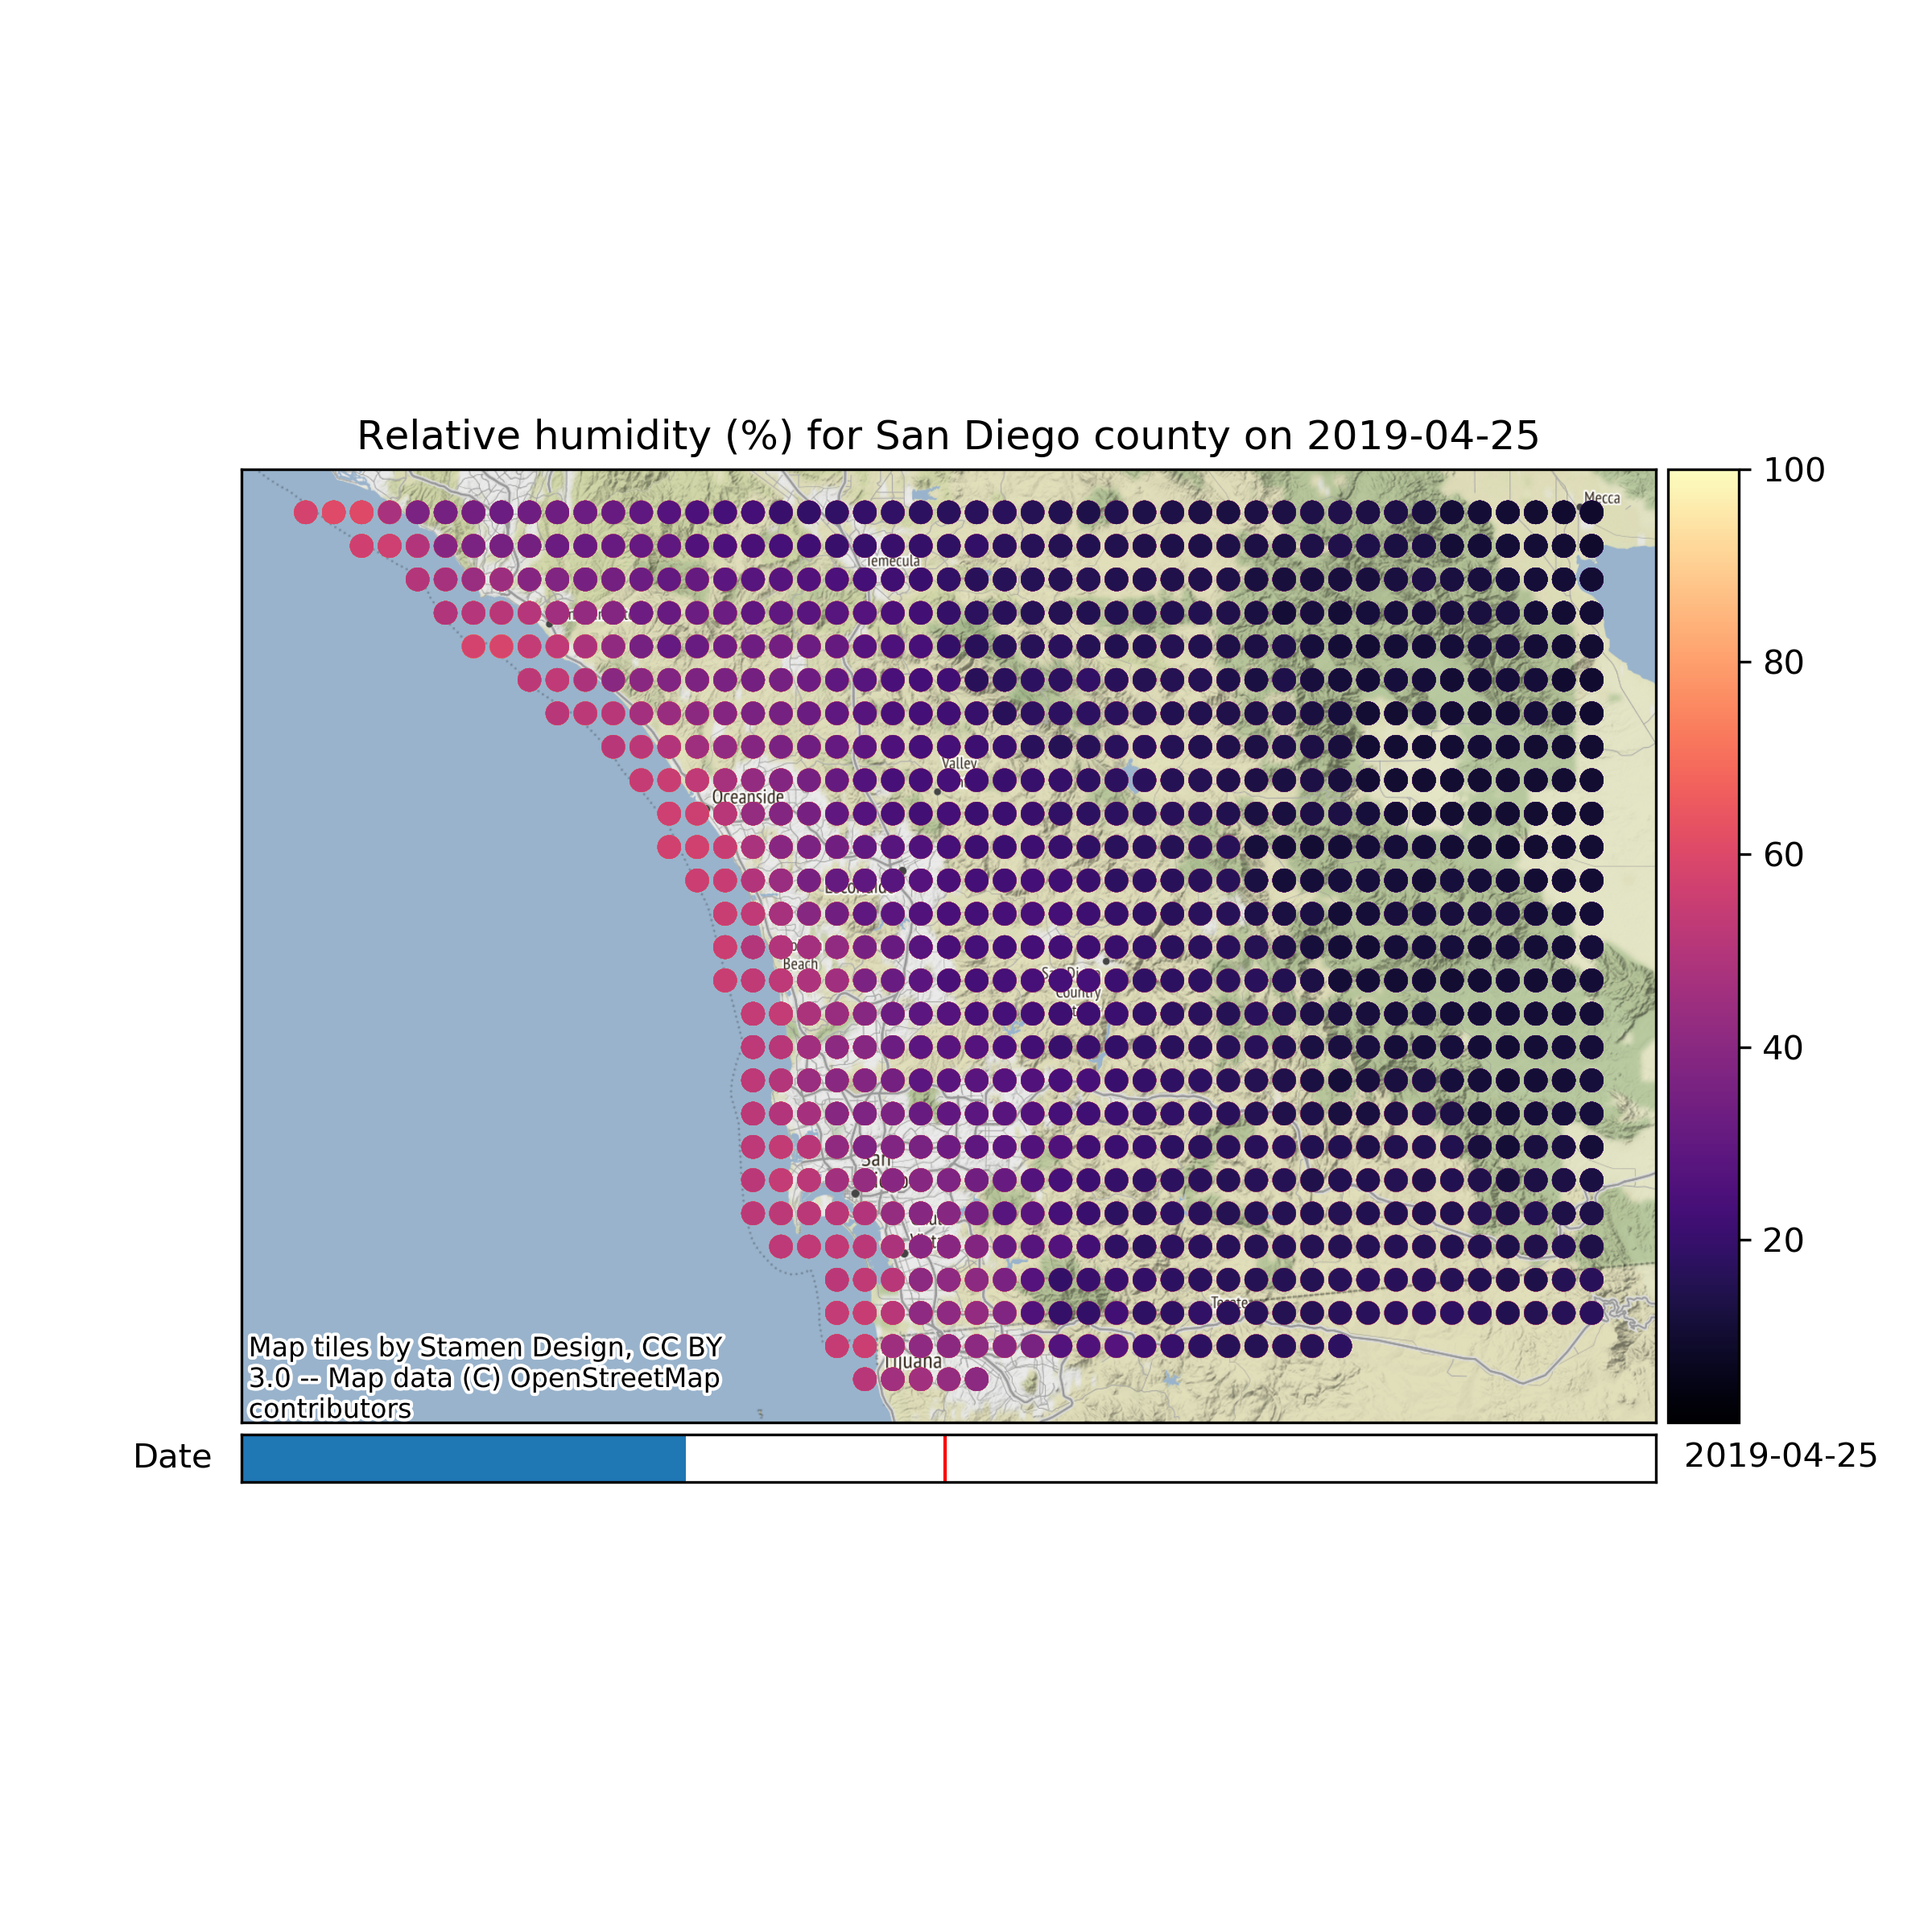

0

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.widgets import Slider
from matplotlib.dates import date2num, num2date
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

f, ax = plt.subplots(1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
sax = divider.append_axes("bottom", size="5%", pad=0.05)
date = pd.to_datetime('2019-07-01', format="%Y-%m-%d")
date_str = date.strftime("%Y-%m-%d")
mask = df.date == date
vmin = df["relative_humidity_%"].min()
vmax = df["relative_humidity_%"].max()
cbar_tick_delta = vmax - vmin
cbar_ticks=[vmin + cbar_tick_delta * 0.1 * i for i in range(0, 11)]
cmap = 'magma'
plt.colorbar(ScalarMappable(norm=Normalize(vmin, vmax), cmap=cmap), cax=cax)
df[mask].plot(
    ax=ax,
    column='relative_humidity_%',
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    alpha=1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Relative humidity (%) for San Diego county on {}".format(date_str))
ctx.add_basemap(ax)

slider = Slider(sax,
               'Date',
               date2num(pd.to_datetime('20190101', format="%Y%m%d")),
               date2num(pd.to_datetime('20191231', format="%Y%m%d")),
               valinit=date2num(date))
slider.valtext.set_text(date_str)

def update(val):
    date = num2date(val)
    date = pd.to_datetime("{}{}{}".format(date.year, date.month, date.day), format="%Y%m%d")
    mask = df.date == date
    date_str = date.strftime("%Y-%m-%d")
    ax.set_title("Relative humidity (%) for San Diego county on {}".format(date_str))
    slider.valtext.set_text(date_str)
    df[mask].plot(
        ax=ax,
        column='relative_humidity_%',
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        alpha=1)
    fig.clear()
    fig.canvas.draw_idle()

slider.on_changed(update)